<a href="https://colab.research.google.com/github/sma9898/adult-language-learning-mtech-2024/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Ingestion

In [192]:
# Import pandas and upload data into a DataFrame
import pandas as pd
df = pd.read_csv('stex.csv', encoding = "ISO-8859-1") # Encoding added to prevent errors

In [193]:
df.head() # Preview the data

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


##Data Cleaning

###Duplicates and Null Values

In [194]:
df.describe() # Check the descriptive statistics to see if anything is obviously incorrect

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,50235.000000,50235.000000,50226.000000,50235.000000,50235.000000,48426.000000,50235.000000,48219.000000,48219.000000
mean,26.487648,3.923002,3.134213,81.147029,517.622275,0.050150,0.411063,14.468073,20.117049
std,7.245634,4.275746,0.855379,25.346411,37.917385,0.056546,0.189779,5.645576,3.602436
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.010463,6.000000,13.000000
25%,22.000000,2.000000,3.000000,67.000000,494.000000,0.018300,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,21.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,32.000000,27.000000


There doesn't seem to be anything obviously awry with this data. All values seem to make sense within the context of what is being measured.

In [195]:
df[df.duplicated() == True] # Show rows that are duplicated and find out how many

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
278,Afrikaans,SouthAfrica,AfrikaansEnglish,English,27,1,4.0,Male,Indo-European,afr,93,563,NaN,0.010463,NaN,NaN
1355,Arabic,Iraq,ArabicEnglish,English,33,3,4.0,Male,Afro-Asiatic,ara,47,461,0.0638,0.595079,21.0,24.0
1417,Arabic,Iraq,ArabicEnglish,English,29,2,4.0,Male,Afro-Asiatic,ara,47,497,0.0638,0.595079,21.0,24.0
1956,Arabic,Sudan,ArabicEnglish,English,34,3,3.0,Female,Afro-Asiatic,ara,31,484,0.0638,0.595079,21.0,24.0
2229,Arabic,Iraq,ArabicEnglish,English,27,2,4.0,Male,Afro-Asiatic,ara,47,495,0.0638,0.595079,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49366,Turkish,Netherlands,TurkishMonolingual,Monolingual,17,2,3.0,Male,Altaic,tur,118,499,0.0500,0.595079,8.0,20.0
49400,Turkish,Netherlands,TurkishMonolingual,Monolingual,18,3,2.0,Female,Altaic,tur,118,560,0.0500,0.595079,8.0,20.0
49406,Turkish,Turkey,TurkishMonolingual,Monolingual,20,3,3.0,Female,Altaic,tur,79,475,0.0500,0.595079,8.0,20.0
49415,Turkish,Netherlands,TurkishEnglish,English,23,2,4.0,Male,Altaic,tur,118,514,0.0500,0.595079,8.0,20.0


There are 883 duplicate rows, which is a small enough portion of the dataset that it would be safe to drop them. However, the data source claims each row is a unique individual and because it is possible for different people to have identical information in each column, I believe this claim and will not be dropping these rows in my analysis.

In [196]:
df.info() # See how many null values exist and in which columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


There are 1,809 null values in 'morph' and 2,016 null values in 'new_feat' and 'new_sounds'.

If needed for analysis, we can just drop the rows with null values as they are a small enough portion of the dataset.

There doesn't seem to be a reasonable way to impute the values, so I will either leave them or drop them.

In [197]:
df.dropna(inplace=True) # Remove rows with missing values
df.info() # Check that no more values are missing

<class 'pandas.core.frame.DataFrame'>
Index: 47232 entries, 301 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          47232 non-null  object 
 1   C           47232 non-null  object 
 2   L1L2        47232 non-null  object 
 3   L2          47232 non-null  object 
 4   AaA         47232 non-null  int64  
 5   LoR         47232 non-null  int64  
 6   Edu.day     47232 non-null  float64
 7   Sex         47232 non-null  object 
 8   Family      47232 non-null  object 
 9   ISO639.3    47232 non-null  object 
 10  Enroll      47232 non-null  int64  
 11  Speaking    47232 non-null  int64  
 12  morph       47232 non-null  float64
 13  lex         47232 non-null  float64
 14  new_feat    47232 non-null  float64
 15  new_sounds  47232 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [198]:
#df['new_sounds'].value_counts() # Looked at value_counts() for each column to check for standardization or logic issues

In [199]:
df.describe() # Look at the updated descriptive statistics after removing duplicates and null values

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000
mean,26.499111,3.916476,3.137724,81.520982,517.745321,0.045661,0.408578,14.362868,20.090066
std,7.243453,4.240134,0.854258,25.147873,37.871203,0.045828,0.188669,5.612681,3.628497
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.037325,6.000000,13.000000
25%,22.000000,2.000000,3.000000,70.000000,495.000000,0.012800,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,20.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,26.000000,27.000000


Null and duplicate values have been handled, and cursory analysis doesn't show any obvious standardization or logic issues, so the data should be ready for analysis at this point.

###Outliers

In [200]:
# Outliers in AaA column using Z-score
df.loc[((df['AaA'] - df['AaA'].mean()) / df['AaA'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
746,Arabic,Morocco,ArabicFrench,French,49,6,4.0,Male,Afro-Asiatic,ara,49,518,0.0638,0.595079,21.0,24.0
793,Arabic,Iraq,ArabicRussian,Russian,52,3,4.0,Male,Afro-Asiatic,ara,47,438,0.0638,0.595079,21.0,24.0
1112,Arabic,Iraq,ArabicFrench,French,56,3,4.0,Male,Afro-Asiatic,ara,47,438,0.0638,0.595079,21.0,24.0
1208,Arabic,Iraq,ArabicEnglish,English,50,1,4.0,Male,Afro-Asiatic,ara,47,576,0.0638,0.595079,21.0,24.0
1267,Arabic,Iraq,ArabicEnglish,English,49,6,3.0,Male,Afro-Asiatic,ara,47,491,0.0638,0.595079,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46673,Tigrigna,Eritrea,TigrignaEnglish,English,52,2,4.0,Male,Afro-Asiatic,tir,30,500,0.0458,0.595079,17.0,25.0
49189,Turkish,Turkey,TurkishGerman,German,51,2,4.0,Female,Altaic,tur,79,509,0.0500,0.595079,8.0,20.0
49728,Ukranian,USSR,UkranianEnglish,English,52,2,4.0,Female,Indo-European,ukr,90,476,0.0468,0.394100,20.0,22.0
50095,Vietnamese,Vietnam,VietnameseEnglish,English,49,4,4.0,Female,Austro-Asiatic,vie,67,474,0.2859,0.595079,17.0,19.0


322 outliers in AaA

In [201]:
# Outliers in LoR column using Z-score
df.loc[((df['LoR'] - df['LoR'].mean()) / df['LoR'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
373,Albanian,Yugoslavia,AlbanianGerman,German,0,25,3.0,Male,Indo-European,sqi,85,528,0.0412,0.595079,11.0,21.0
427,Albanian,Yugoslavia,AlbanianEnglish,English,0,33,4.0,Male,Indo-European,sqi,85,499,0.0412,0.595079,11.0,21.0
499,Albanian,Albania,AlbanianMonolingual,Monolingual,0,30,3.0,Female,Indo-European,sqi,78,534,0.0412,0.595079,11.0,21.0
619,Amharic,Ethiopia,AmharicEnglish,English,27,23,4.0,Female,Afro-Asiatic,amh,25,535,0.0657,0.595079,18.0,19.0
683,Amharic,Ethiopia,AmharicEnglish,English,39,18,1.0,Male,Afro-Asiatic,amh,25,416,0.0657,0.595079,18.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50138,Vietnamese,Vietnam,VietnameseMonolingual,Monolingual,25,17,3.0,Female,Austro-Asiatic,vie,67,544,0.2859,0.595079,17.0,19.0
50142,Vietnamese,Vietnam,VietnameseEnglish,English,24,20,4.0,Male,Austro-Asiatic,vie,67,489,0.2859,0.595079,17.0,19.0
50149,Vietnamese,Vietnam,VietnameseMonolingual,Monolingual,29,19,3.0,Female,Austro-Asiatic,vie,67,477,0.2859,0.595079,17.0,19.0
50157,Vietnamese,Vietnam,VietnameseEnglish,English,29,21,3.0,Male,Austro-Asiatic,vie,67,465,0.2859,0.595079,17.0,19.0


1,141 outliers in LoR

In [202]:
# Outliers in Edu.day column using Z-score
df.loc[((df['Edu.day'] - df['Edu.day'].mean()) / df['Edu.day'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds


No outliers in Edu.day

In [203]:
# Outliers in Enroll column using Z-score
df.loc[((df['Enroll'] - df['Enroll'].mean()) / df['Enroll'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds


No outliers in Enroll

In [204]:
# Outliers in Speaking column using Z-score
df.loc[((df['Speaking'] - df['Speaking'].mean()) / df['Speaking'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
1012,Arabic,UnitedStates,ArabicEnglish,English,29,7,4.0,Female,Afro-Asiatic,ara,94,644,0.0638,0.595079,21.0,24.0
1777,Arabic,Morocco,ArabicMonolingual,Monolingual,12,25,3.0,Female,Afro-Asiatic,ara,49,632,0.0638,0.595079,21.0,24.0
3342,Arabic,Morocco,ArabicEnglish,English,28,1,3.0,Female,Afro-Asiatic,ara,49,633,0.0638,0.595079,21.0,24.0
3615,Arabic,Morocco,ArabicFrench,French,23,5,3.0,Female,Afro-Asiatic,ara,49,642,0.0638,0.595079,21.0,24.0
4654,Arabic,Netherlands,ArabicFrench,French,26,1,3.0,Female,Afro-Asiatic,ara,118,647,0.0638,0.595079,21.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47579,Turkish,Turkey,TurkishEnglish,English,18,5,3.0,Female,Altaic,tur,79,660,0.0500,0.595079,8.0,20.0
47801,Turkish,Turkey,TurkishEnglish,English,5,14,3.0,Female,Altaic,tur,79,634,0.0500,0.595079,8.0,20.0
48232,Turkish,Turkey,TurkishEnglish,English,23,2,4.0,Male,Altaic,tur,79,663,0.0500,0.595079,8.0,20.0
48629,Turkish,Turkey,TurkishMonolingual,Monolingual,0,30,2.0,Male,Altaic,tur,79,632,0.0500,0.595079,8.0,20.0


230 outliers in Speaking

In [205]:
# Outliers in morph column using Z-score
df.loc[((df['morph'] - df['morph'].mean()) / df['morph'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
22148,Igbo,Philippines,IgboEnglish,English,30,4,3.0,Female,Niger-Congo,ibo,83,420,0.3269,0.595079,15.0,17.0
22149,Igbo,Nigeria,IgboEnglish,English,22,4,3.0,Female,Niger-Congo,ibo,35,435,0.3269,0.595079,15.0,17.0
22150,Igbo,Nigeria,IgboEnglish,English,38,3,3.0,Male,Niger-Congo,ibo,35,498,0.3269,0.595079,15.0,17.0
22151,Igbo,Nigeria,IgboEnglish,English,26,0,4.0,Female,Niger-Congo,ibo,35,446,0.3269,0.595079,15.0,17.0
22152,Igbo,Nigeria,IgboEnglish,English,34,6,3.0,Male,Niger-Congo,ibo,35,532,0.3269,0.595079,15.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,Yoruba,Nigeria,YorubaEnglish,English,29,8,3.0,Male,Niger-Congo,yor,35,514,0.2162,0.595079,25.0,22.0
50231,Yoruba,Nigeria,YorubaEnglish,English,28,2,4.0,Female,Niger-Congo,yor,35,505,0.2162,0.595079,25.0,22.0
50232,Yoruba,Nigeria,YorubaEnglish,English,27,12,3.0,Female,Niger-Congo,yor,35,502,0.2162,0.595079,25.0,22.0
50233,Yoruba,Nigeria,YorubaEnglish,English,26,2,3.0,Male,Niger-Congo,yor,35,426,0.2162,0.595079,25.0,22.0


875 outliers in morph

In [206]:
# Outliers in lex column using Z-score
df.loc[((df['lex'] - df['lex'].mean()) / df['lex'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds


No outliers in lex

In [207]:
# Outliers in new_feat column using Z-score
df.loc[((df['new_feat'] - df['new_feat'].mean()) / df['new_feat'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds


No outliers in new_feat

In [208]:
# Outliers in new_sounds column using Z-score
df.loc[((df['new_sounds'] - df['new_sounds'].mean()) / df['new_sounds'].std()) > 3]

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds


No outliers in new_sounds

Some outliers have been identified, but for this analysis, they will not be altered, just acknowledged.

##Data Manipulation

In [209]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
301,Albanian,Albania,AlbanianEnglish,English,17,3,3.0,Male,Indo-European,sqi,78,515,0.0412,0.595079,11.0,21.0
302,Albanian,Albania,AlbanianGerman,German,23,1,4.0,Female,Indo-European,sqi,78,521,0.0412,0.595079,11.0,21.0
303,Albanian,Yugoslavia,AlbanianCroatian,Croatian,22,3,3.0,Female,Indo-European,sqi,85,519,0.0412,0.595079,11.0,21.0
304,Albanian,Albania,AlbanianEnglish,English,30,3,4.0,Female,Indo-European,sqi,78,528,0.0412,0.595079,11.0,21.0
305,Albanian,Albania,AlbanianGreek,Greek,17,1,1.0,Female,Indo-European,sqi,78,481,0.0412,0.595079,11.0,21.0


In [210]:
df.describe()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000
mean,26.499111,3.916476,3.137724,81.520982,517.745321,0.045661,0.408578,14.362868,20.090066
std,7.243453,4.240134,0.854258,25.147873,37.871203,0.045828,0.188669,5.612681,3.628497
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.037325,6.000000,13.000000
25%,22.000000,2.000000,3.000000,70.000000,495.000000,0.012800,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,20.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,26.000000,27.000000


In [211]:
# Group by the native language (L1) and sort by test score (Speaking) from high to low
L1_group_df = df[['L1', 'Speaking', 'morph', 'lex', 'new_feat', 'new_sounds']].groupby('L1').mean().sort_values(by='Speaking', ascending=False)
L1_group_df

,Speaking,morph,lex,new_feat,new_sounds
L1,,,,,
German,554.773249,-0.0171,0.037325,6.0,13.0
Swedish,552.288462,0.0000,0.100457,8.0,22.0
Norwegian,549.551724,-0.0076,0.159800,14.0,24.0
Czech,540.048832,0.0540,0.385180,9.0,15.0
Finnish,538.046218,0.0277,0.595079,13.0,17.0
Hungarian,537.362720,0.0101,0.595079,6.0,13.0
English,534.577303,0.0094,0.083191,11.0,19.0
Icelandic,534.268293,0.0059,0.117423,14.0,20.0
Byelorussian,533.730769,0.0468,0.398188,12.0,22.0


In [212]:
# Group by gender
gender_group_df = df[['Sex', 'Speaking']].groupby('Sex').mean().sort_values(by='Speaking', ascending=False)
gender_group_df

,Speaking
Sex,
Female,524.078786
Male,505.391742


In [213]:
# Add column indicating whether someone is monolingual or multilingual
mono_df = pd.DataFrame(df)
mono_df['Monolingual'] = (df['L2'] == 'Monolingual')
mono_df['Monolingual'] = mono_df['Monolingual'].replace({True: 'Monolingual', False: 'Multilingual'})
mono_df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds,Monolingual
301,Albanian,Albania,AlbanianEnglish,English,17,3,3.0,Male,Indo-European,sqi,78,515,0.0412,0.595079,11.0,21.0,Multilingual
302,Albanian,Albania,AlbanianGerman,German,23,1,4.0,Female,Indo-European,sqi,78,521,0.0412,0.595079,11.0,21.0,Multilingual
303,Albanian,Yugoslavia,AlbanianCroatian,Croatian,22,3,3.0,Female,Indo-European,sqi,85,519,0.0412,0.595079,11.0,21.0,Multilingual
304,Albanian,Albania,AlbanianEnglish,English,30,3,4.0,Female,Indo-European,sqi,78,528,0.0412,0.595079,11.0,21.0,Multilingual
305,Albanian,Albania,AlbanianGreek,Greek,17,1,1.0,Female,Indo-European,sqi,78,481,0.0412,0.595079,11.0,21.0,Multilingual


In [227]:
# Group by gender
mono_group_df = mono_df[['Monolingual', 'Speaking']].groupby('Monolingual').mean().sort_values(by='Speaking', ascending=False)
mono_group_df

,Speaking
Monolingual,
Multilingual,519.381640
Monolingual,510.318949


##Data Visualization

In [214]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

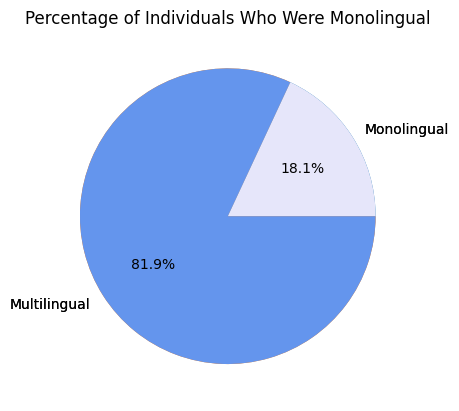

In [215]:
# Pie chart to show proportion of respondants who were monolingual vs multilingual
agg_mono_df = mono_df.groupby('Monolingual', as_index=False).agg({'L1': 'count'})
agg_mono_df.rename(columns={'L1': 'Count'}, inplace=True)
fig, ax = plt.subplots()
ax.pie(agg_mono_df['Count'], labels=agg_mono_df['Monolingual'], autopct='%1.1f%%')
plt.pie(agg_mono_df['Count'], labels=agg_mono_df['Monolingual'], colors=['lavender', 'cornflowerblue'])
plt.title('Percentage of Individuals Who Were Monolingual')
plt.show()

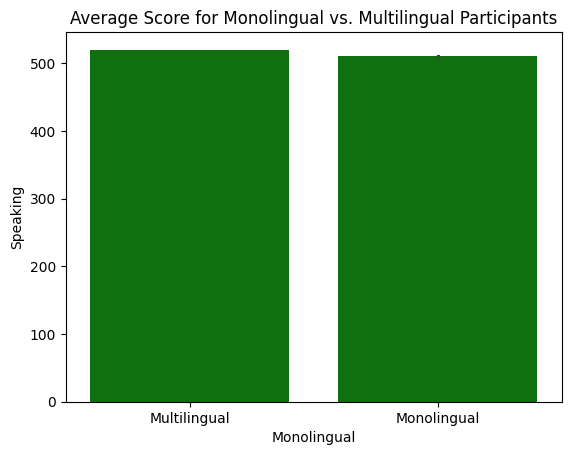

In [226]:
# Bar chart comparing average Speaking score for those who were monolingual vs multilingual
sns.barplot(x='Monolingual', y='Speaking', data=mono_df, color='green')
plt.title('Average Score for Monolingual vs. Multilingual Participants')
plt.show()

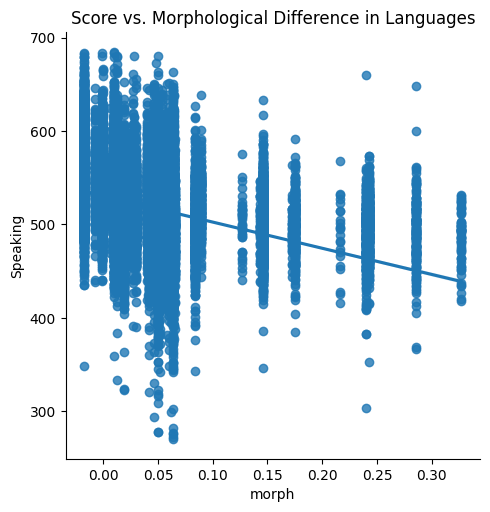

In [217]:
# Scatter plot of Speaking vs morph
sns.lmplot(x='morph', y='Speaking', data=df)
plt.title('Score vs. Morphological Difference in Languages')
plt.show()

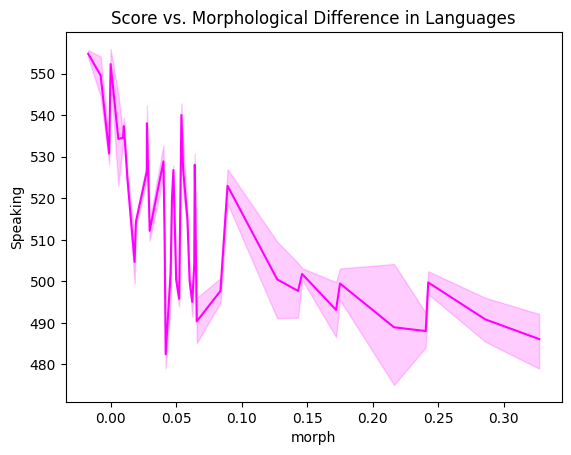

In [218]:
# Line plot of Speaking vs morph
sns.lineplot(x='morph', y='Speaking', data=df, color='magenta')
plt.title('Score vs. Morphological Difference in Languages')
plt.show()

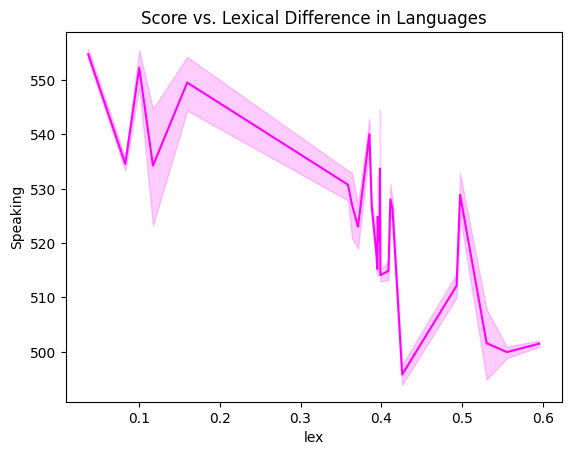

In [219]:
# Line plot of Speaking vs lex
sns.lineplot(x='lex', y='Speaking', data=df, color='magenta')
plt.title('Score vs. Lexical Difference in Languages')
plt.show()

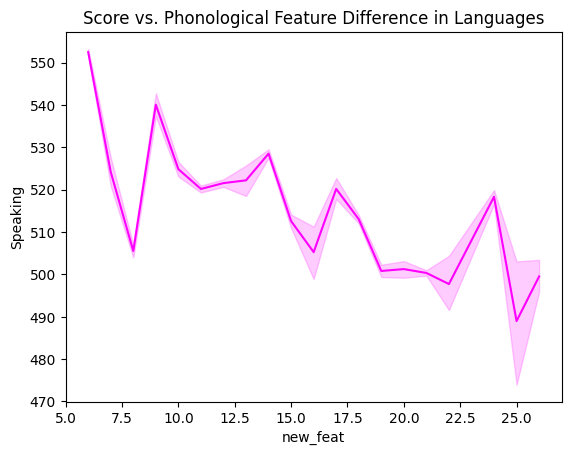

In [220]:
# Line plot of Speaking vs new_feat
sns.lineplot(x='new_feat', y='Speaking', data=df, color='magenta')
plt.title('Score vs. Phonological Feature Difference in Languages')
plt.show()

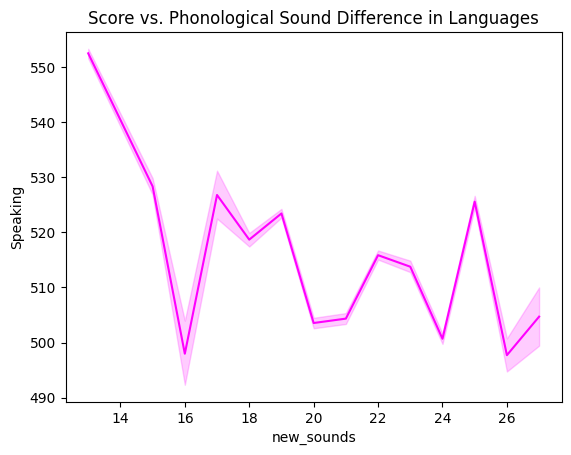

In [221]:
# Line plot of Speaking vs new_sounds
sns.lineplot(x='new_sounds', y='Speaking', data=df, color='magenta')
plt.title('Score vs. Phonological Sound Difference in Languages')
plt.show()

##Statistical Analysis

In [222]:
df.describe()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000,47232.000000
mean,26.499111,3.916476,3.137724,81.520982,517.745321,0.045661,0.408578,14.362868,20.090066
std,7.243453,4.240134,0.854258,25.147873,37.871203,0.045828,0.188669,5.612681,3.628497
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.037325,6.000000,13.000000
25%,22.000000,2.000000,3.000000,70.000000,495.000000,0.012800,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,20.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,26.000000,27.000000


In [223]:
df[['AaA', 'LoR', 'Edu.day', 'Enroll', 'Speaking', 'morph', 'lex', 'new_feat', 'new_sounds']].mode()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,25,2,3.0,101,506,0.0638,0.595079,21.0,20.0


The ages of people in this dataset range from 0 to 88 years old, with an average age of 26. The mean (26.5) and median (26) are very similar and the mode is 25, so there doesn't seem to be significant skew.

The average length of residence is 3.9 years with 75% of respondants having a residence of 5 years or less. Though there are a few outliers, including at least one person who has resided in the Netherlands for 59 years.

In [224]:
# Correlation btw AaA, LoR, Edu.day, Enroll, Speaking, morph, lex, new_feat, new_sounds
df[['AaA', 'LoR', 'Edu.day', 'Enroll', 'Speaking', 'morph', 'lex', 'new_feat', 'new_sounds']].corr()
# The last few columns seem to have some correlation, but the others don't

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
AaA,1.000000,-0.186468,0.220018,-0.005743,-0.142799,0.015794,-0.032294,0.060526,0.042179
LoR,-0.186468,1.000000,-0.092137,-0.079533,0.011918,0.065533,0.095332,0.046433,0.056959
Edu.day,0.220018,-0.092137,1.000000,0.028788,0.032187,0.014184,-0.005911,0.026705,0.032535
Enroll,-0.005743,-0.079533,0.028788,1.000000,0.369232,-0.364350,-0.525878,-0.475006,-0.332073
Speaking,-0.142799,0.011918,0.032187,0.369232,1.000000,-0.339032,-0.439832,-0.331776,-0.328579
morph,0.015794,0.065533,0.014184,-0.364350,-0.339032,1.000000,0.650866,0.504850,0.396710
lex,-0.032294,0.095332,-0.005911,-0.525878,-0.439832,0.650866,1.000000,0.627772,0.580421
new_feat,0.060526,0.046433,0.026705,-0.475006,-0.331776,0.504850,0.627772,1.000000,0.665386
new_sounds,0.042179,0.056959,0.032535,-0.332073,-0.328579,0.396710,0.580421,0.665386,1.000000


The column that has the strongest correlation with test score (Speaking) is lex at -0.439832, which is a moderate negative correlation. The other features most correlated with Speaking are Enroll, morph, new_feat, and new_sounds. All but Enroll are measures of how different Dutch is from the individual's native language (L1) and are significantly correlated with one another.